<a href="https://colab.research.google.com/github/BronteDallas/Data_Architecture_-_Machine_Learning/blob/main/FinalProject_Bronte_Dallas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practical Machine Learning 
### Project: Model Selection

# Abstract

# Part 1: Business and Data Understanding

### Q. Identify a suitable dataset for your canditate question(s)

Go have a look at any of these websites:

* https://www.kaggle.com/datasets 
* https://datasetsearch.research.google.com/
* https://data.gov.uk/

Find an interesting looking data set related to your problem domain and get a copy of it


### Q. Define the problem domain

In [ ]:
# This project is within the medical domain. The dataset contains rows 
# representing data for individual patients with breast tumors along with their
# diagnosis, as either malignant or benign.

# The reason for this machine learning project is to create a machine learning
# model that will be able to learn from this dataset and then predict if the 
# breast tumors of other patients are malignant or benign.

### Q. Identify candidate questions for your machine learning project

In [ ]:
# In this Machine Learning project the inputs (x values) are the values
# associated with the colomn headings that correspond to data collected
# for each patient with a breast tumor. These are: 'radius_mean','texture_mean',
# 'perimeter_mean','area_mean','smoothness_mean','compactness_mean',
# 'concavity_mean','symmetry_mean','fractal_dimension_mean'.

# The output (y value) expected from the machine learning, is the diagnosis as
# to whether a patients breast tumor is malignant or benign, based off their
# row set of collected data. A doctor can then make an informed decision 
# regarding a patients diagnosis.

# Hence the question to be answered, given a row set of patient data, is:
# 'Does the patient have a malignant or benign breast tumor?' 

In [ ]:
import pandas as pd
datapath = 'breastcancer_data.csv'
data = pd.read_csv(datapath, header=0)
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.2419,0.07871
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.1812,0.05667
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.2069,0.05999
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.2597,0.09744
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.1809,0.05883


### Q. Generate a descriptive statistics report for the columns in your dataset

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,1138.0,1.523243e+07,8.965268e+07,8670.00000,92995.25000,93279.50000,906012.50000,9.113205e+08
radius_mean,1138.0,1.412729e+01,3.522499e+00,6.98100,11.70000,13.37000,15.78000,2.811000e+01
texture_mean,1138.0,1.928965e+01,4.299144e+00,9.71000,16.17000,18.84000,21.80000,3.928000e+01
perimeter_mean,1138.0,9.196903e+01,2.428829e+01,43.79000,75.17000,86.24000,104.10000,1.885000e+02
area_mean,1138.0,6.548891e+02,3.517593e+02,143.50000,420.30000,551.10000,782.70000,2.501000e+03
smoothness_mean,1138.0,9.636028e-02,1.405794e-02,0.05263,0.08637,0.09587,0.10530,1.634000e-01
compactness_mean,1138.0,1.043410e-01,5.278953e-02,0.01938,0.06492,0.09263,0.13040,3.454000e-01
concavity_mean,1138.0,8.879932e-02,7.968474e-02,0.00000,0.02956,0.06154,0.13070,4.268000e-01
symmetry_mean,1138.0,1.811619e-01,2.740222e-02,0.10600,0.16190,0.17920,0.19570,3.040000e-01
fractal_dimension_mean,1138.0,6.279761e-02,7.057257e-03,0.04996,0.05770,0.06154,0.06612,9.744000e-02


In [ ]:
# Generate correlation heatmap

In [ ]:
correlations = data.corr() 
correlations 

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean
id,1.000000,0.052010,0.069534,0.050988,0.067529,-0.009038,0.000067,0.034903,-0.015412,-0.036598
radius_mean,0.052010,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.147741,-0.311631
texture_mean,0.069534,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.071401,-0.076437
perimeter_mean,0.050988,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.183027,-0.261477
area_mean,0.067529,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.151293,-0.283110
smoothness_mean,-0.009038,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.557775,0.584792
compactness_mean,0.000067,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.602641,0.565369
concavity_mean,0.034903,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.500667,0.336783
symmetry_mean,-0.015412,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,1.000000,0.479921
fractal_dimension_mean,-0.036598,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.479921,1.000000


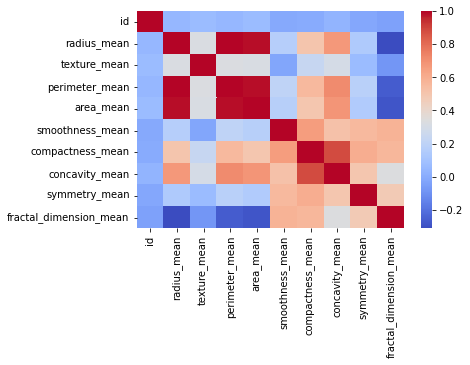

In [ ]:
import seaborn as sns # visualization library 
sns.heatmap(correlations, cmap='coolwarm') # coolwarm-> red and blue color style

In [ ]:
# In english not python- rationale why you choose to select or drop columns

# I have decided not to drop any colomns at this point as they all seem to have
# some correlations with the other colomns, apart from the 'id' colomn,
# which is not expected to correlate with the other colomn as the 'id' is to 
# identify the patient, not a result or data to be used for diagnosis in this 
# research. Hence the 'id' colomn would be best suited to being the index rather
# than removing this colomn.

# The rest of the colomns do seem to have some level of correlation to one
# another which is shown by the fact there are no colomns which have mostly 
# medium blue correlation boxes. That being said, the 'texture_mean' colomn 
# does seem to have the least amount of correlation with any of the other
# colums, shown by the fact that the highest correlation with another colomn
# is about 0.3, as indicated by the grey coloured boxes, as per the key on the
# right.

In [ ]:
# convert 'id' colomn to index instead of removing the colomn
data = data.set_index("id")
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean
id,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.2419,0.07871
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.1812,0.05667
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.2069,0.05999
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.2597,0.09744
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.1809,0.05883


# Part 2: Data Preparation

### Q. Discuss the following types of missing data and how they would be handled in reference to your dataset where applicable.
*	Missing completely at random (MCAR)
*	Missing at random (MAR)
*	Missing Not at Random (MNAR)

In [ ]:
# Check for null values

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1138 entries, 842302 to 93320
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   diagnosis               1138 non-null   object 
 1   radius_mean             1138 non-null   float64
 2   texture_mean            1138 non-null   float64
 3   perimeter_mean          1138 non-null   float64
 4   area_mean               1138 non-null   float64
 5   smoothness_mean         1138 non-null   float64
 6   compactness_mean        1138 non-null   float64
 7   concavity_mean          1138 non-null   float64
 8   symmetry_mean           1138 non-null   float64
 9   fractal_dimension_mean  1138 non-null   float64
dtypes: float64(9), object(1)
memory usage: 97.8+ KB


In [ ]:
# The data.info() results above show that there are no null values, hence MCAR,
# MAR and MNAR are not applicable to this dataset, however I have given a brief
# description of each below.

# MCAR: This is when data is missing during testing as well as during 
#       production. It implies that the causes of the missing data are
#       not related to the data itself, therefore it is general practice
#       to not use colomns in which data is missing completely at random.

# MAR:  This is when data is available during training but missing
#       during production. Hence, the colomn which has missing values should
#       not be used for learning.

# MNAR: This is when data is missing during training but is available during
#       production. In this case the missing values from training should be
#       removed from the dataset.

# Part 3: Model Selection

### Q. Use the cheat sheet below to choose the algorithm/estimator suitable for building a model to address your candidate question(s)

* https://scikit-learn.org/stable/tutorial/machine_learning_map/

In [ ]:
# train_test_split-> xtrain,ytrain,xtest,ytest
from sklearn.model_selection import train_test_split
# select y as the 'diagnosis' colomn
y = data.loc[:,['diagnosis']]
# specify x to contain 9 colomns, not including colomn 0 which is now 'diagnosis'
# since 'id' is no longer included as a colomn simce it was indexed
x = data.iloc[:, 1:]

xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=50)

In [ ]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean
id,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.2419,0.07871
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.1812,0.05667
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.2069,0.05999
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.2597,0.09744
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.1809,0.05883


In [ ]:
ytrain.head()

,diagnosis
id,
93224,B
93092,B
93109,B
908445,M
92898,M


In [ ]:
xtrain.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean
id,,,,,,,,,
93224,14.92,14.93,96.45,686.9,0.08098,0.08549,0.05539,0.1687,0.05669
93092,14.42,16.54,94.15,641.2,0.09751,0.11390,0.08007,0.1912,0.06412
93109,13.87,16.21,88.52,593.7,0.08743,0.05492,0.01502,0.1424,0.05883
908445,18.82,21.97,123.70,1110.0,0.10180,0.13890,0.15940,0.1943,0.06132
92898,11.80,16.58,78.99,432.0,0.10910,0.17000,0.16590,0.2678,0.07371


In [ ]:
ytest.head()

,diagnosis
id,
93137,M
93314,M
862009,B
913535,M
93099,B


In [ ]:
xtest.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean
id,,,,,,,,,
93137,14.60,23.29,93.97,664.7,0.08682,0.06636,0.08390,0.1627,0.05416
93314,15.22,30.62,103.40,716.9,0.10480,0.20870,0.25500,0.2128,0.07152
862009,13.45,18.30,86.60,555.1,0.10220,0.08165,0.03974,0.1638,0.05710
913535,16.69,20.20,107.10,857.6,0.07497,0.07112,0.03649,0.1846,0.05325
93099,14.76,14.74,94.87,668.7,0.08875,0.07780,0.04608,0.1521,0.05912


In [ ]:
# Noramlizing can be done via the Z-score or MinMax. I will chose to do the 
# Z-score method but I will write out the MinMax method code but not run it.
# The assuptions from the training data will be applied ti the testing data.

In [ ]:
# I will normalize the x data (input data)
# The output data in this case is M or B based on the diagnosis of malignant
# or benign so as Machine Learning only works with numbers I will convert M and
# B into 1 and 0

In [ ]:
# Z-score normalization method
zmean = xtrain.describe().T['mean']
zstd = xtrain.describe().T['std']
# z-score = (data-mean)/standard_deviation 
xtrain_norm = (xtrain-zmean)/zstd
xtest_norm = (xtest-zmean)/zstd 

In [ ]:
xtrain_norm.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean
id,,,,,,,,,
93224,0.216031,-1.026856,0.174902,0.083295,-1.114327,-0.372123,-0.432111,-0.472640,-0.872863
93092,0.074559,-0.653407,0.080465,-0.047061,0.057487,0.158095,-0.126295,0.315004,0.172614
93109,-0.081060,-0.729952,-0.150701,-0.182551,-0.657085,-0.942653,-0.932345,-1.393308,-0.571743
908445,1.319509,0.606113,1.293777,1.290155,0.361606,0.624672,0.856702,0.423523,-0.221374
92898,-0.666752,-0.644129,-0.541999,-0.643788,0.879104,1.205093,0.937245,2.996492,1.522026


In [ ]:
xtest_norm.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean
id,,,,,,,,,
93137,0.125489,0.912295,0.073074,0.019971,-0.700328,-0.729147,-0.078836,-0.682678,-1.228860
93314,0.300913,2.612531,0.460267,0.168867,0.574276,1.927354,2.041304,1.071141,1.213870
862009,-0.199896,-0.245165,-0.229535,-0.292654,0.389962,-0.443789,-0.626033,-0.644171,-0.815172
913535,0.716840,0.195552,0.612187,0.570203,-1.540377,-0.640311,-0.666305,0.083961,-1.356906
93099,0.170760,-1.070927,0.110028,0.031381,-0.563510,-0.515642,-0.547473,-1.053746,-0.530937


In [ ]:
# MinMax normalization method --> won't run this but just to show this is an
# alternative normalization method

# zmax = xtrain.describe().T['max']
# zmin = xtrain.describe().T['min']
# MinMax-> (data-min)/(max-min)
# xtrain_norm = (xtrain-zmin)/(zmax-zmin)
# xtest_norm = (xtest-zmin)/(zmax-zmin)

In [ ]:
# convert M and B into 1 and 0 for y (output) diagnosis data
ydic = {'M':1,'B':0}
ytrain_encoded =ytrain['diagnosis'].apply(lambda x: ydic[x])
ytest_encoded = ytest['diagnosis'].apply(lambda x : ydic[x])

In [ ]:
ytrain_encoded.head()

id
93224     0
93092     0
93109     0
908445    1
92898     1
Name: diagnosis, dtype: int64

In [ ]:
ytest_encoded.head()

id
93137     1
93314     1
862009    0
913535    1
93099     0
Name: diagnosis, dtype: int64

In [ ]:
for col in data.columns:
  print(col + ' : ' + str(data[col].value_counts().count()))

diagnosis : 2
radius_mean : 456
texture_mean : 479
perimeter_mean : 522
area_mean : 539
smoothness_mean : 474
compactness_mean : 537
concavity_mean : 537
symmetry_mean : 432
fractal_dimension_mean : 499


In [ ]:
# based on the above, for this dataset a Classifcation estimator would be more
# suitable than a Regression estimator as the data is discrete not continuous

In [ ]:
# Importing Classification estimators/algorithms
from sklearn.linear_model import SGDClassifier # gradient descent
from sklearn.svm import SVC, LinearSVC # graph
from sklearn.naive_bayes import GaussianNB # probability
from sklearn.tree import DecisionTreeClassifier # TREE based 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.neighbors import KNeighborsClassifier
allalgos = {"Stochastic Gradient Descend":SGDClassifier(),
            "Support Vector Machines": SVC(),
            "Linear SVM": LinearSVC(),
            "Gaussian Naive Bayes'": GaussianNB(),
            "Tree Tree": DecisionTreeClassifier(),
            "Jungle": RandomForestClassifier(),
            "KNN": KNeighborsClassifier()}

In [ ]:
for algoName, model in allalgos.items():
  print('*****')
  print(algoName)
  model.fit(xtrain_norm, ytrain_encoded)
  predictions = model.predict(xtest_norm)
  print(predictions)

*****
Stochastic Gradient Descend
[1 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0
 1 0 0 1 0 1 0 1 0 1 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0
 0 0 0 1 1 0 1 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0 1 0 1 1 1 0 0 1 1 0 0 0 0 1 0
 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 1 0 0 1 1 1 0 1 1 0 1 0 0 1 1 1 0 0 1 0 1 1
 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 1 0 0 1 1 1 1 0 1 1
 0 0 0 0 0 0]
*****
Support Vector Machines
[1 1 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 1 1 1 1 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0
 0 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 0 0 1 0 1 1 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 1 1 1 0 0 1 1 0 0 0 0 1 0
 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 1 0 0 1 1 0 0 1 1 1 1 0 0 1 1 1 0 0 1 0 1 1
 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 1 1 1 1 0 1 1
 0 0 0 0 0 0]
*****
Li

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[1 1 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0
 1 0 1 0 0 1 0 1 0 1 0 0 1 0 0 0 0 1 1 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0
 0 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 0 0 1 0 1 1 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 1 1 0 0 1 1 0 0 0 0 1 0
 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0 1 0 0 1 1 0 0 1 1 1 0 0 0 1 1 1 1 0 1 0 1 1
 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0 1 1 0 1 1
 0 0 0 0 0 0]
*****
KNN
[1 1 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 1 0 1 0 1 0 1 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0
 0 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 0 0 1 0 1 1 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 1 1 0 0 1 1 0 1 1 0 1 0
 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 1 0 0 1 1 0 0 1 1 0 1 0 0 1 1 1 1 0 1 0 1 1
 1 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 1 0 0 0 1 1 1 1 0 1 1
 0 0 0 0 0 0]


# Part 4: Model Evaluation

### Q. Identify which of the statistical measures below are suitable for the evaluation of your model.

Classification Metrics:
* Accuracy
* Precision
* Recall
* F1 Score

Regression Metrics:
    
* Mean absolute error (MAE)
* Root mean squared error (RMSE)
* Relative absolute error (RAE)
* Relative squared error (RSE)
* Mean Zero One Error (MZOE)
* Coefficient of determination

 

In [ ]:
# Finding the accuracies and cross validation scores for each algorithm

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
all_accuracies = []
all_cvs = []

for algoName, model in allalgos.items():
  print('*****')
  print(algoName)
  model.fit(xtrain_norm, ytrain_encoded)
  predictions = model.predict(xtest_norm)
  accScore = accuracy_score(ytest_encoded, predictions)
  cvsScore = cross_val_score(model, xtrain_norm, ytrain_encoded, cv=5)
  all_accuracies.append([algoName,accScore])
  all_cvs.append([algoName, cvsScore])
  print(accScore)
  print(cvsScore)

*****
Stochastic Gradient Descend
0.9166666666666666
[0.91208791 0.94505495 0.95604396 0.91758242 0.94505495]
*****
Support Vector Machines
0.956140350877193
[0.96703297 0.94505495 0.98351648 0.91758242 0.97802198]
*****
Linear SVM
0.9210526315789473
[0.91758242 0.93956044 0.97802198 0.91208791 0.96703297]
*****
Gaussian Naive Bayes'
0.9035087719298246
[0.92857143 0.91208791 0.93956044 0.8956044  0.90659341]
*****
Tree Tree


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


0.9824561403508771
[0.97802198 0.98351648 0.97252747 0.95054945 0.96153846]
*****
Jungle
0.9912280701754386
[0.98901099 0.96703297 0.99450549 0.96153846 0.97802198]
*****
KNN
0.9342105263157895
[0.97252747 0.95604396 0.97252747 0.93406593 0.92857143]


In [ ]:
all_accuracies

[['Stochastic Gradient Descend', 0.9166666666666666],
 ['Support Vector Machines', 0.956140350877193],
 ['Linear SVM', 0.9210526315789473],
 ["Gaussian Naive Bayes'", 0.9035087719298246],
 ['Tree Tree', 0.9824561403508771],
 ['Jungle', 0.9912280701754386],
 ['KNN', 0.9342105263157895]]

In [ ]:
# For this dataset algorithm RandomForestClassifier ('Jungle') have the highest
# accuracy at 0.991

In [ ]:
all_cvs

[['Stochastic Gradient Descend',
  array([0.91208791, 0.94505495, 0.95604396, 0.91758242, 0.94505495])],
 ['Support Vector Machines',
  array([0.96703297, 0.94505495, 0.98351648, 0.91758242, 0.97802198])],
 ['Linear SVM',
  array([0.91758242, 0.93956044, 0.97802198, 0.91208791, 0.96703297])],
 ["Gaussian Naive Bayes'",
  array([0.92857143, 0.91208791, 0.93956044, 0.8956044 , 0.90659341])],
 ['Tree Tree',
  array([0.97802198, 0.98351648, 0.97252747, 0.95054945, 0.96153846])],
 ['Jungle',
  array([0.98901099, 0.96703297, 0.99450549, 0.96153846, 0.97802198])],
 ['KNN', array([0.97252747, 0.95604396, 0.97252747, 0.93406593, 0.92857143])]]

In [ ]:
# As RandomForestClassifier ('Jungle') has the highest accuracy and consistent
# cross validation scores, I will choose to proceed using the
# RandomForestClassifier algorithm/estimator for this dataset.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(xtrain_norm, ytrain_encoded)
ypred = model.predict(xtest_norm)
ypred[:10]

array([1, 1, 0, 1, 0, 0, 1, 0, 0, 0])

# Part 5: Stretch - Model Deployment

### Q. Evaluate the open-source app framework for Machine Learning model deployment below in your own time.

* https://streamlit.io/

In [ ]:
dir(model)

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_feature_names',
 '_check_n_features',
 '_compute_oob_predictions',
 '_estimator_type',
 '_get_oob_predictions',
 '_get_param_names',
 '_get_tags',
 '_make_estimator',
 '_more_tags',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_required_parameters',
 '_set_oob_score_and_attributes',
 '_validate_X_predict',
 '_validate_data',
 '_validate_estimator',
 '_validate_y_class_weight',
 'apply',
 'base_estimator',
 'base_estimator_',
 'bootstrap',
 'ccp_alpha',
 'class_weight'

In [ ]:
import pickle
pickle.dump(model, open('model.pkl', 'wb'))

In [ ]:
# Consume code for deployment in Azure ML Studio
import sklearn
print(sklearn.__version__)

1.0.2


In [ ]:
# Now I will upload this model into Azure ML Studio and Deploy it to web service,
# as shown in the screenshot below

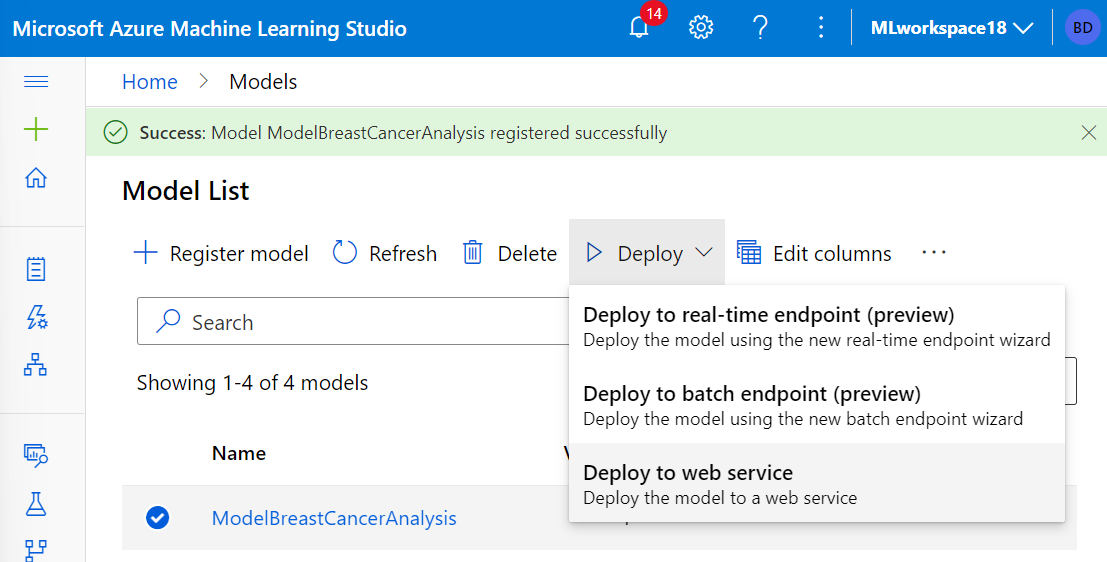

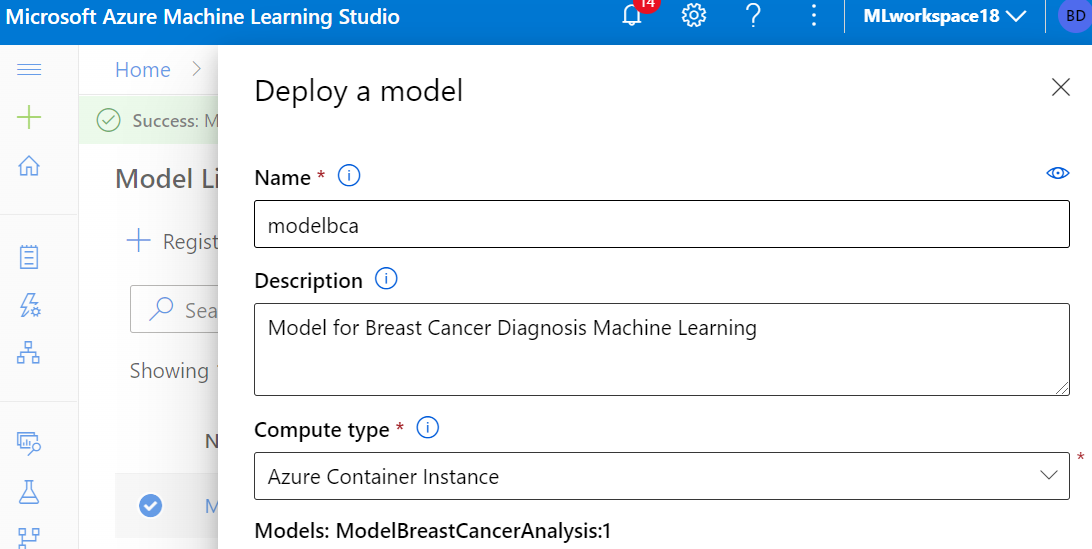

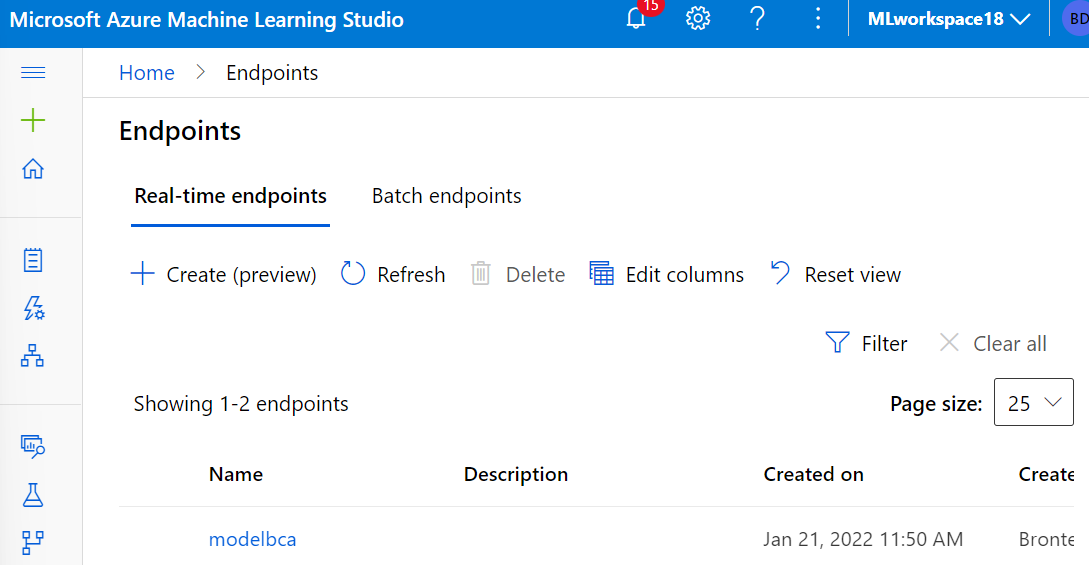

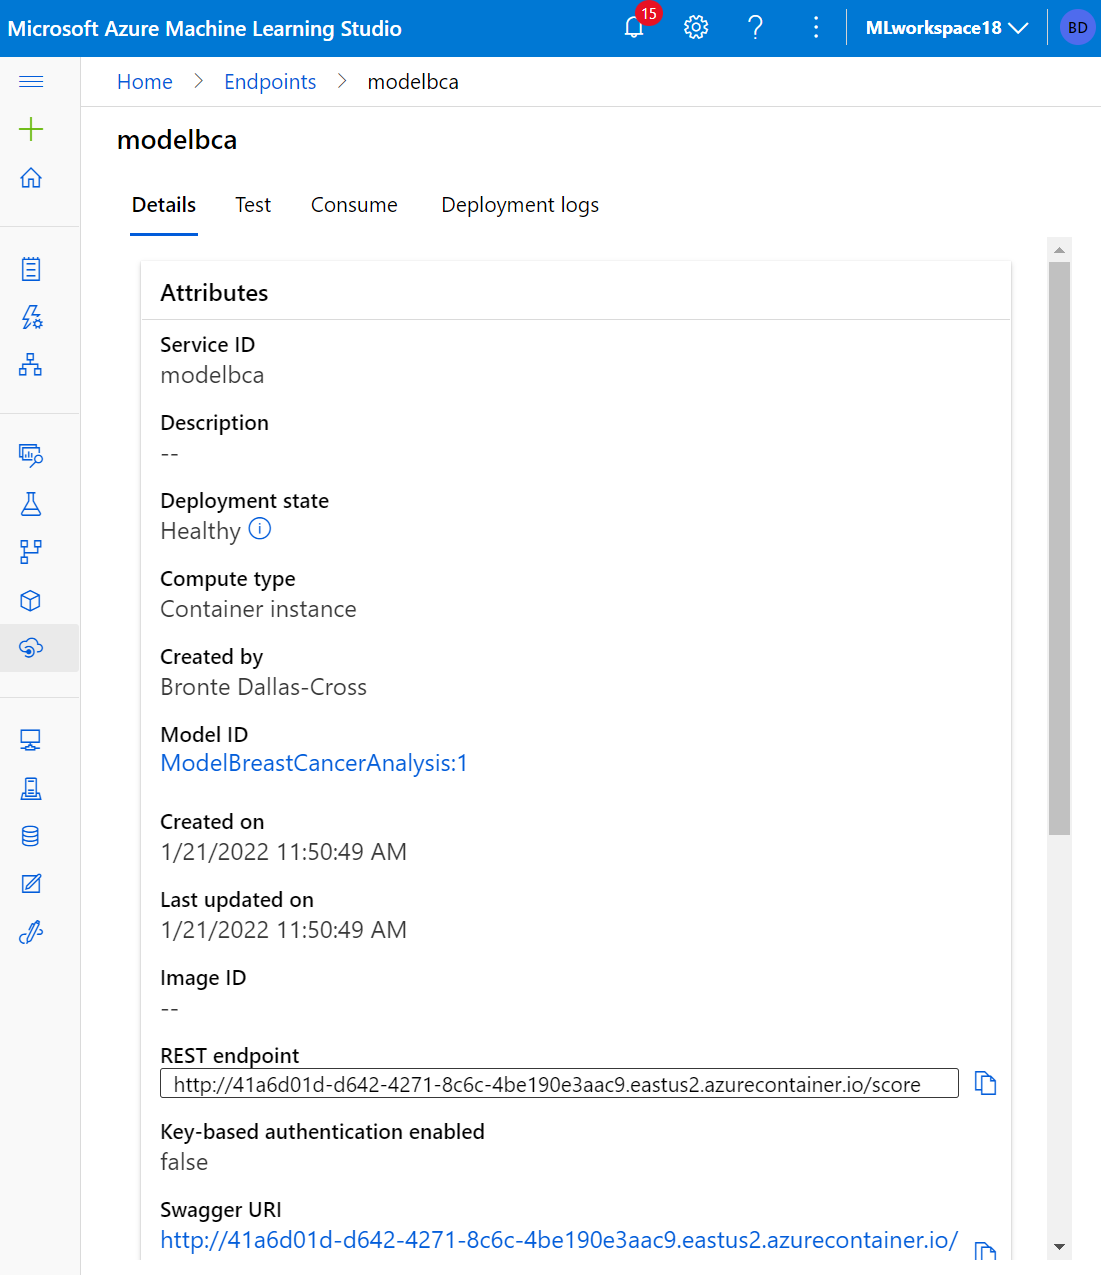

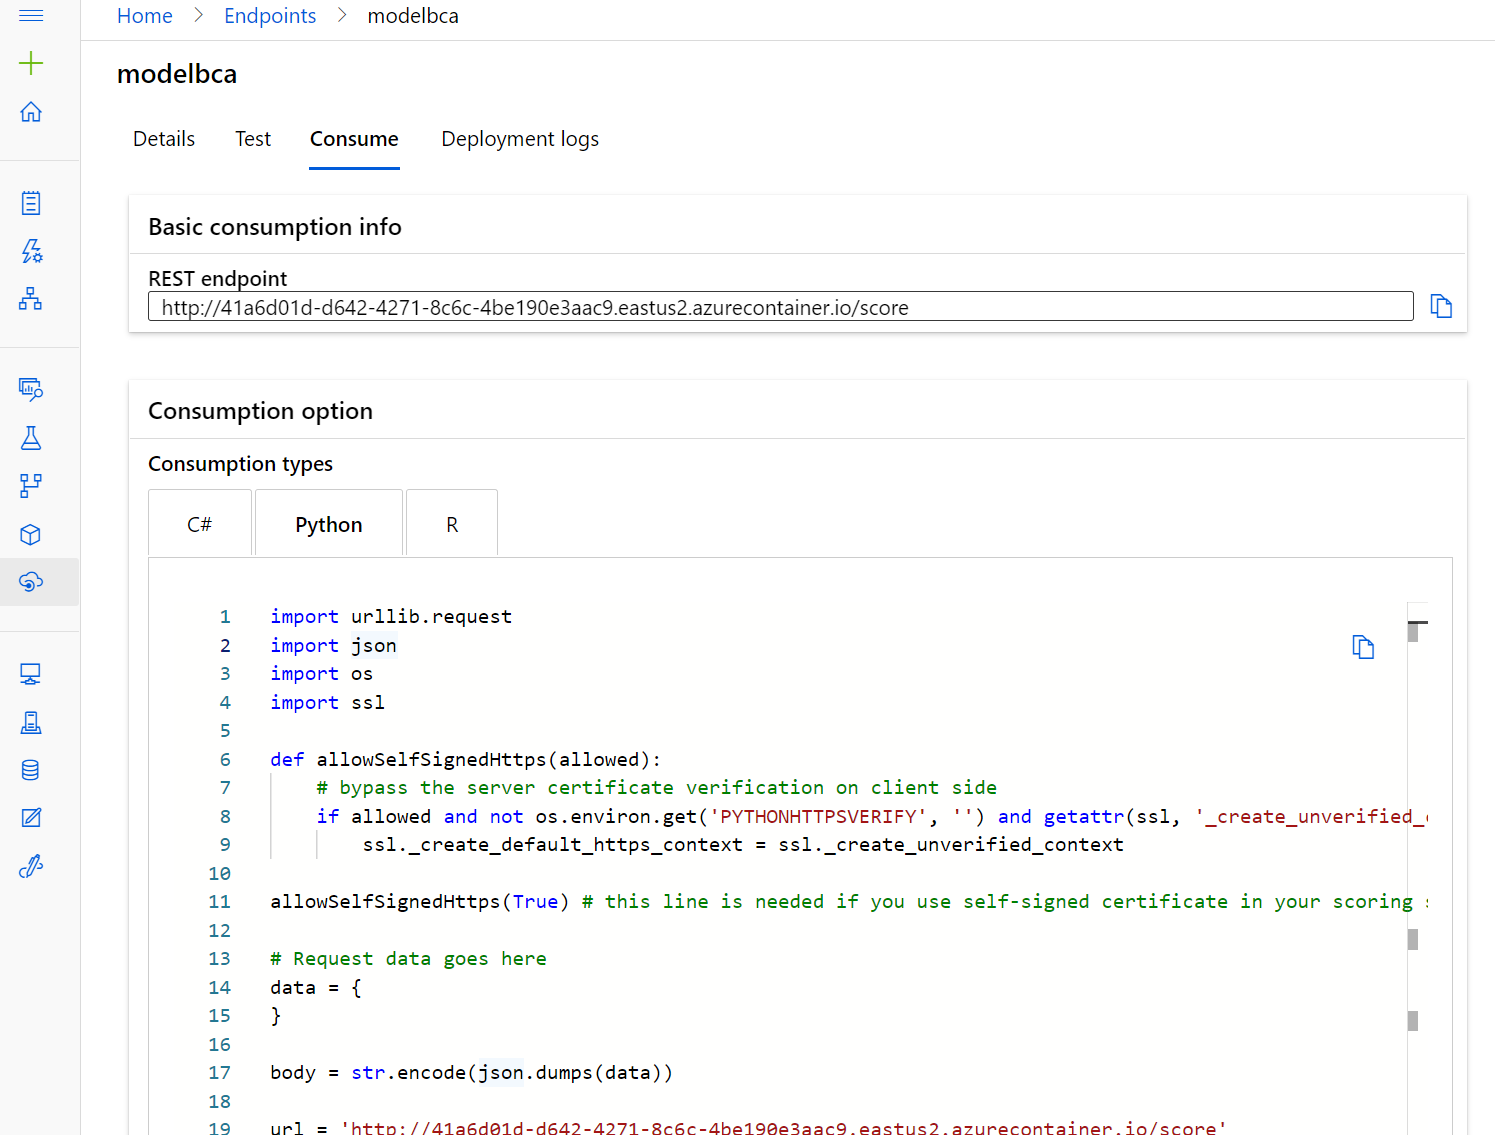

In [ ]:
# Consumption python code for deployment, shown in screenshot above, is copied below

In [ ]:
import urllib.request
import json
import os
import ssl

def allowSelfSignedHttps(allowed):
    # bypass the server certificate verification on client side
    if allowed and not os.environ.get('PYTHONHTTPSVERIFY', '') and getattr(ssl, '_create_unverified_context', None):
        ssl._create_default_https_context = ssl._create_unverified_context

allowSelfSignedHttps(True) # this line is needed if you use self-signed certificate in your scoring service.

# Request data goes here
data = {
}

body = str.encode(json.dumps(data))

url = 'http://41a6d01d-d642-4271-8c6c-4be190e3aac9.eastus2.azurecontainer.io/score'
api_key = '' # Replace this with the API key for the web service
headers = {'Content-Type':'application/json', 'Authorization':('Bearer '+ api_key)}

req = urllib.request.Request(url, body, headers)

try:
    response = urllib.request.urlopen(req)

    result = response.read()
    print(result)
except urllib.error.HTTPError as error:
    print("The request failed with status code: " + str(error.code))

    # Print the headers - they include the requert ID and the timestamp, which are useful for debugging the failure
    print(error.info())
    print(json.loads(error.read().decode("utf8", 'ignore')))

The request failed with status code: 400
Content-Length: 66
Content-Type: application/json
Date: Fri, 21 Jan 2022 14:37:50 GMT
Server: nginx/1.14.0 (Ubuntu)
X-Ms-Request-Id: 8560962c-d8e7-47e2-8748-0fe373b74f29
X-Ms-Run-Fn-Exec-Ms: 0.328
X-Ms-Run-Function-Failed: False
Connection: close


{'status_code': 400, 'message': 'Missing parameter in body: data'}


# **I believe I have now completed the project above using Python. Below I have gone on to also complete the project in a different way using Azure and pipelines.**

In [ ]:
!pip install azureml-core
!pip install azureml-dataset-runtime

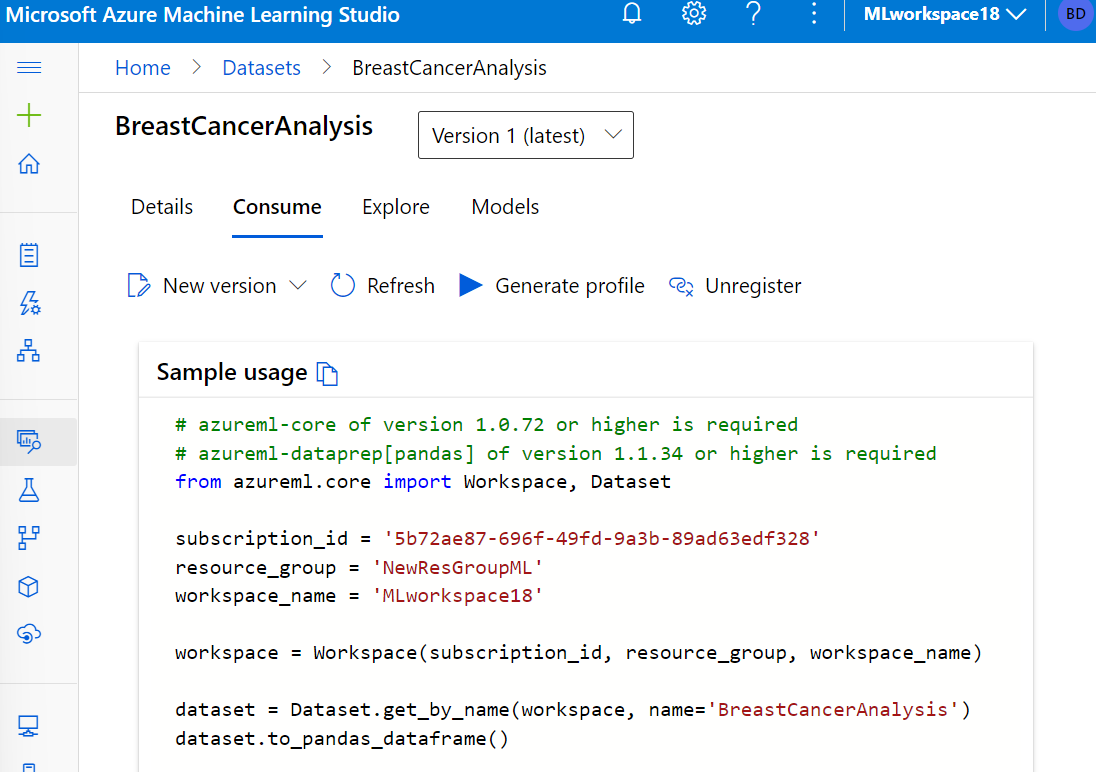

In [ ]:
# azureml-core of version 1.0.72 or higher is required
# azureml-dataprep[pandas] of version 1.1.34 or higher is required
from azureml.core import Workspace, Dataset

subscription_id = '5b72ae87-696f-49fd-9a3b-89ad63edf328'
resource_group = 'NewResGroupML'
workspace_name = 'MLworkspace18'

workspace = Workspace(subscription_id, resource_group, workspace_name)

dataset = Dataset.get_by_name(workspace, name='BreastCancerAnalysis')
dataset.to_pandas_dataframe()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.2419,0.07871
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.1812,0.05667
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.2069,0.05999
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.2597,0.09744
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.1809,0.05883
...,...,...,...,...,...,...,...,...,...,...,...
1133,93316,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.1726,0.05623
1134,93317,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.1752,0.05533
1135,93318,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.1590,0.05648
1136,93319,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.2397,0.07016


In [ ]:
# As this dataset has no null values there is no need to 'Clean Missing Data',
# but I have shown it in the screenshot below to show that this would be used
# for datasets with null values. Also, I have selected all the colomns within
# the 'Select Colomns in Dataset' section.

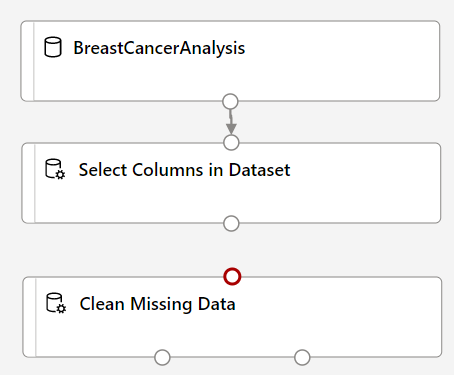

In [ ]:
# Normalise all colomn, excluding 'id' and 'diagnosis' colomns
# Note in general only numerical colomns should be normalised

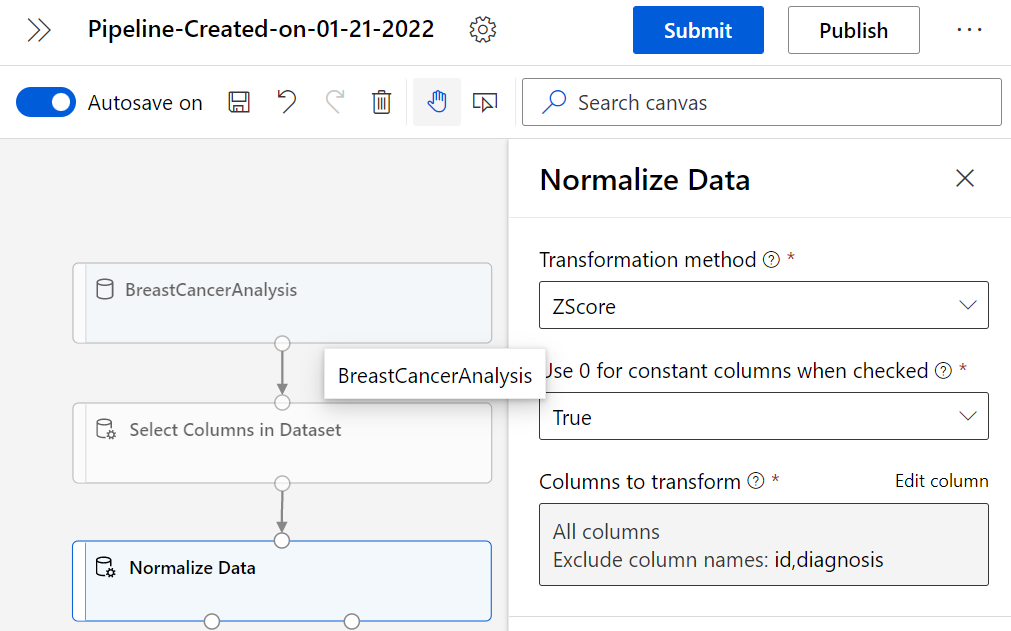

In [ ]:
# Select Label colomn as 'diagnosis' and select any Classification Machine
# Learning Algorithm as this dataset is discrete. Here I have chosen:
# Multiclass Decision Forest

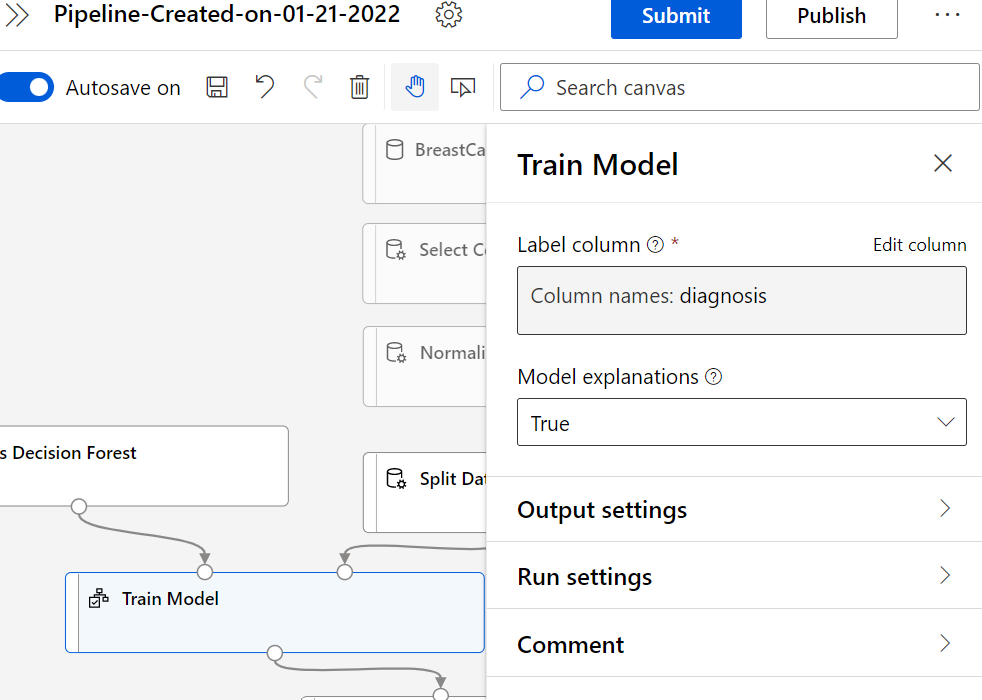

In [ ]:
# Completed pipeline

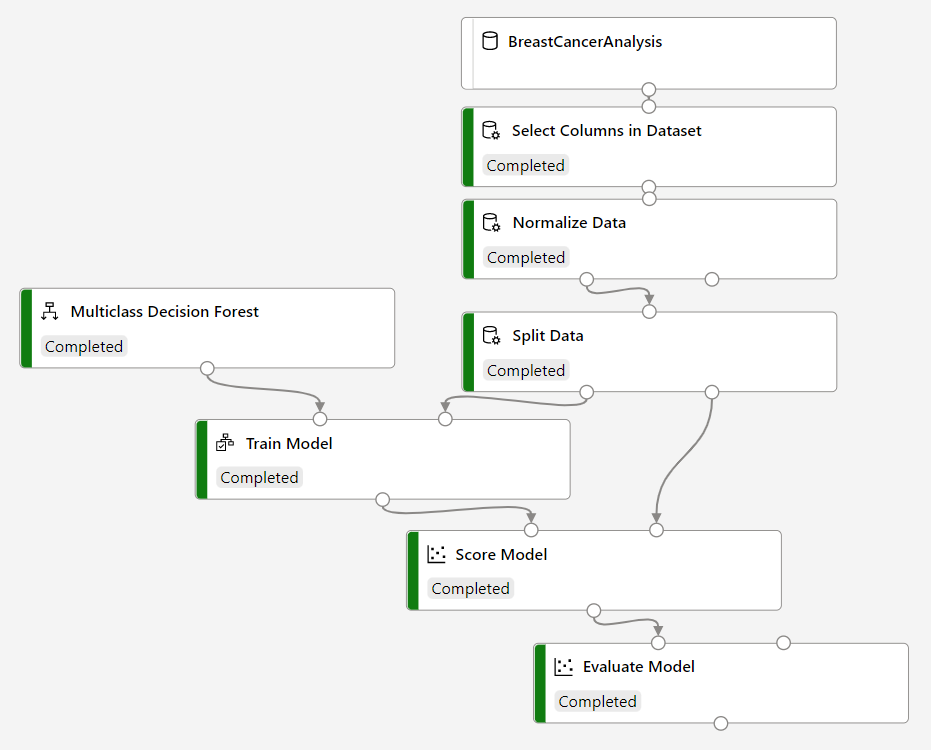

In [ ]:
# Create real time inference pipeline and delete Evaluate model step

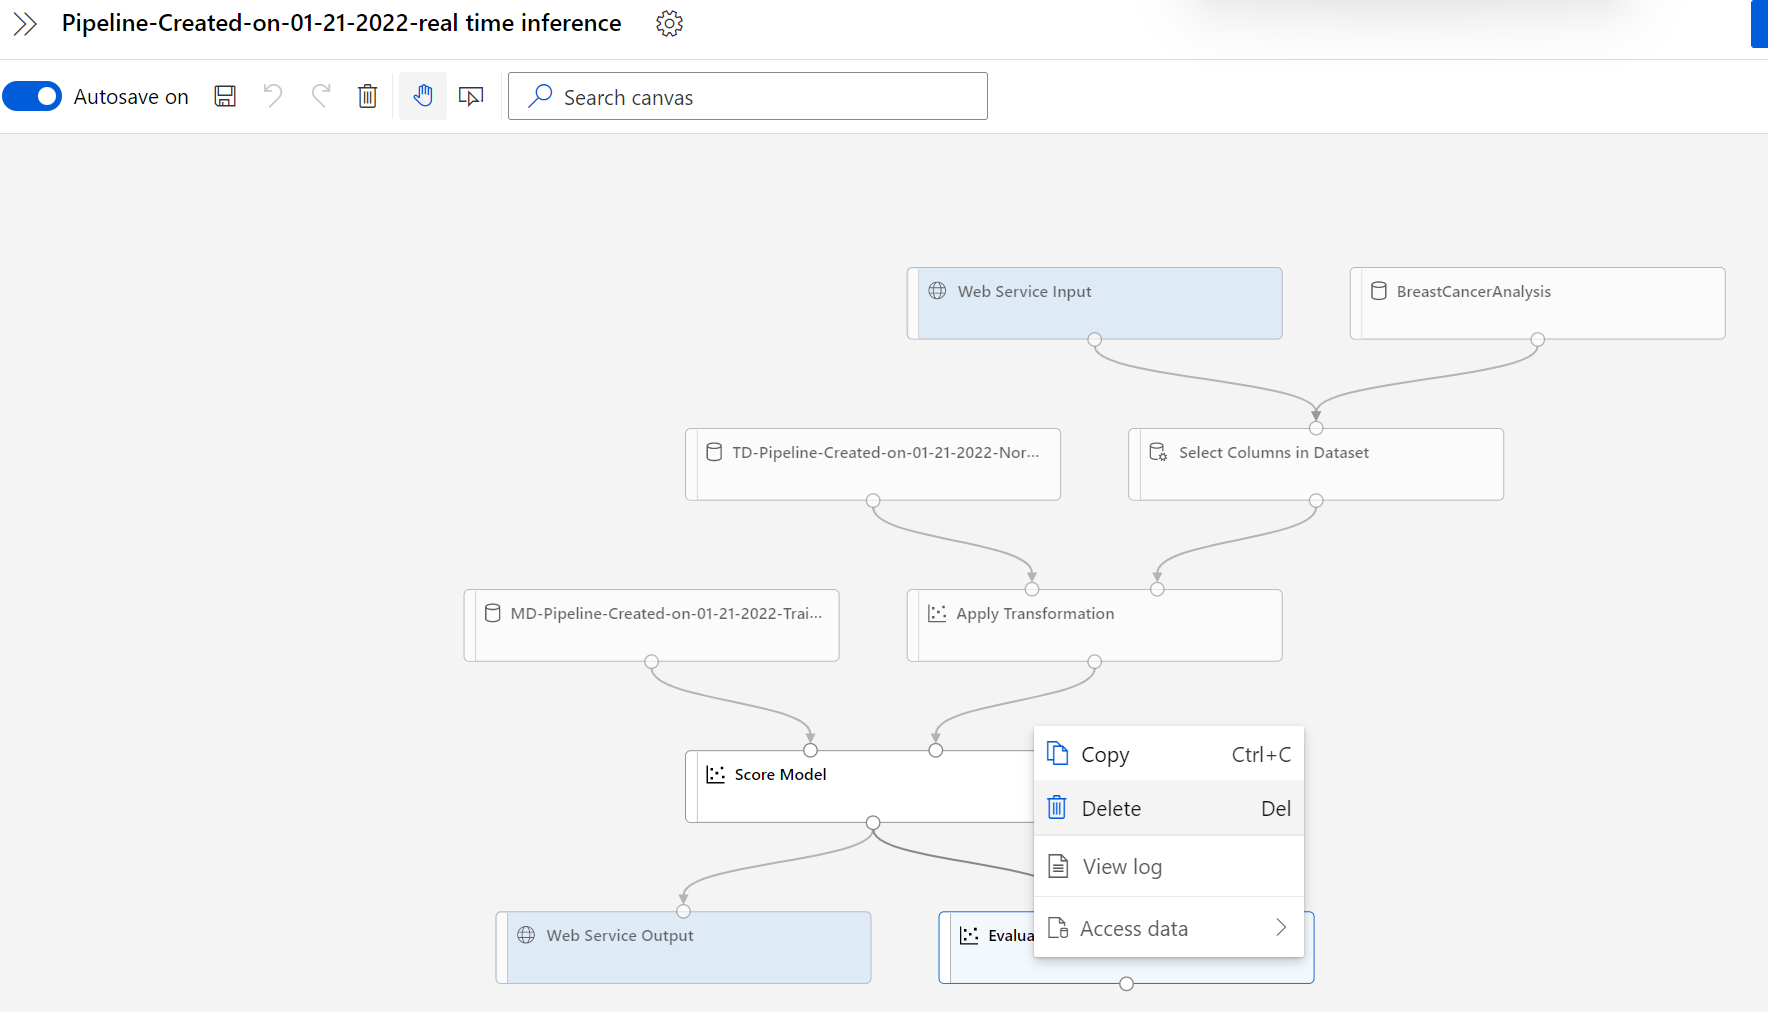

In [ ]:
# Submit and create new experiment

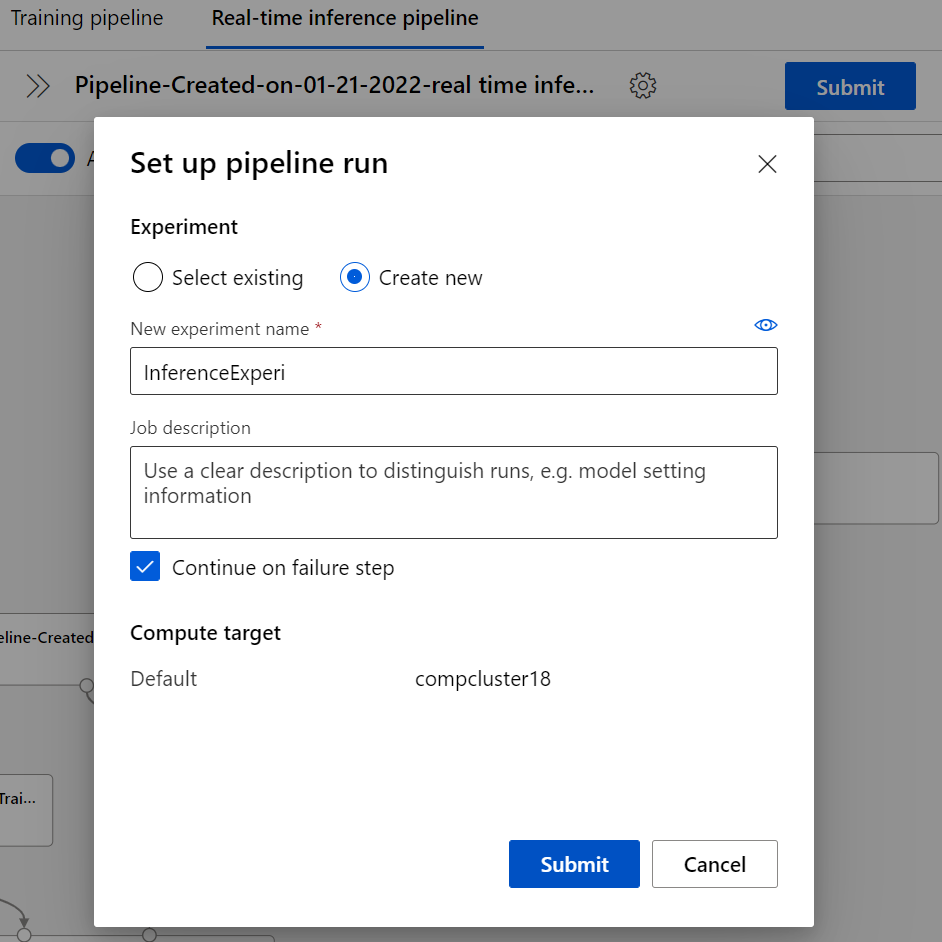

In [ ]:
# Deploy once run finished (click top right)

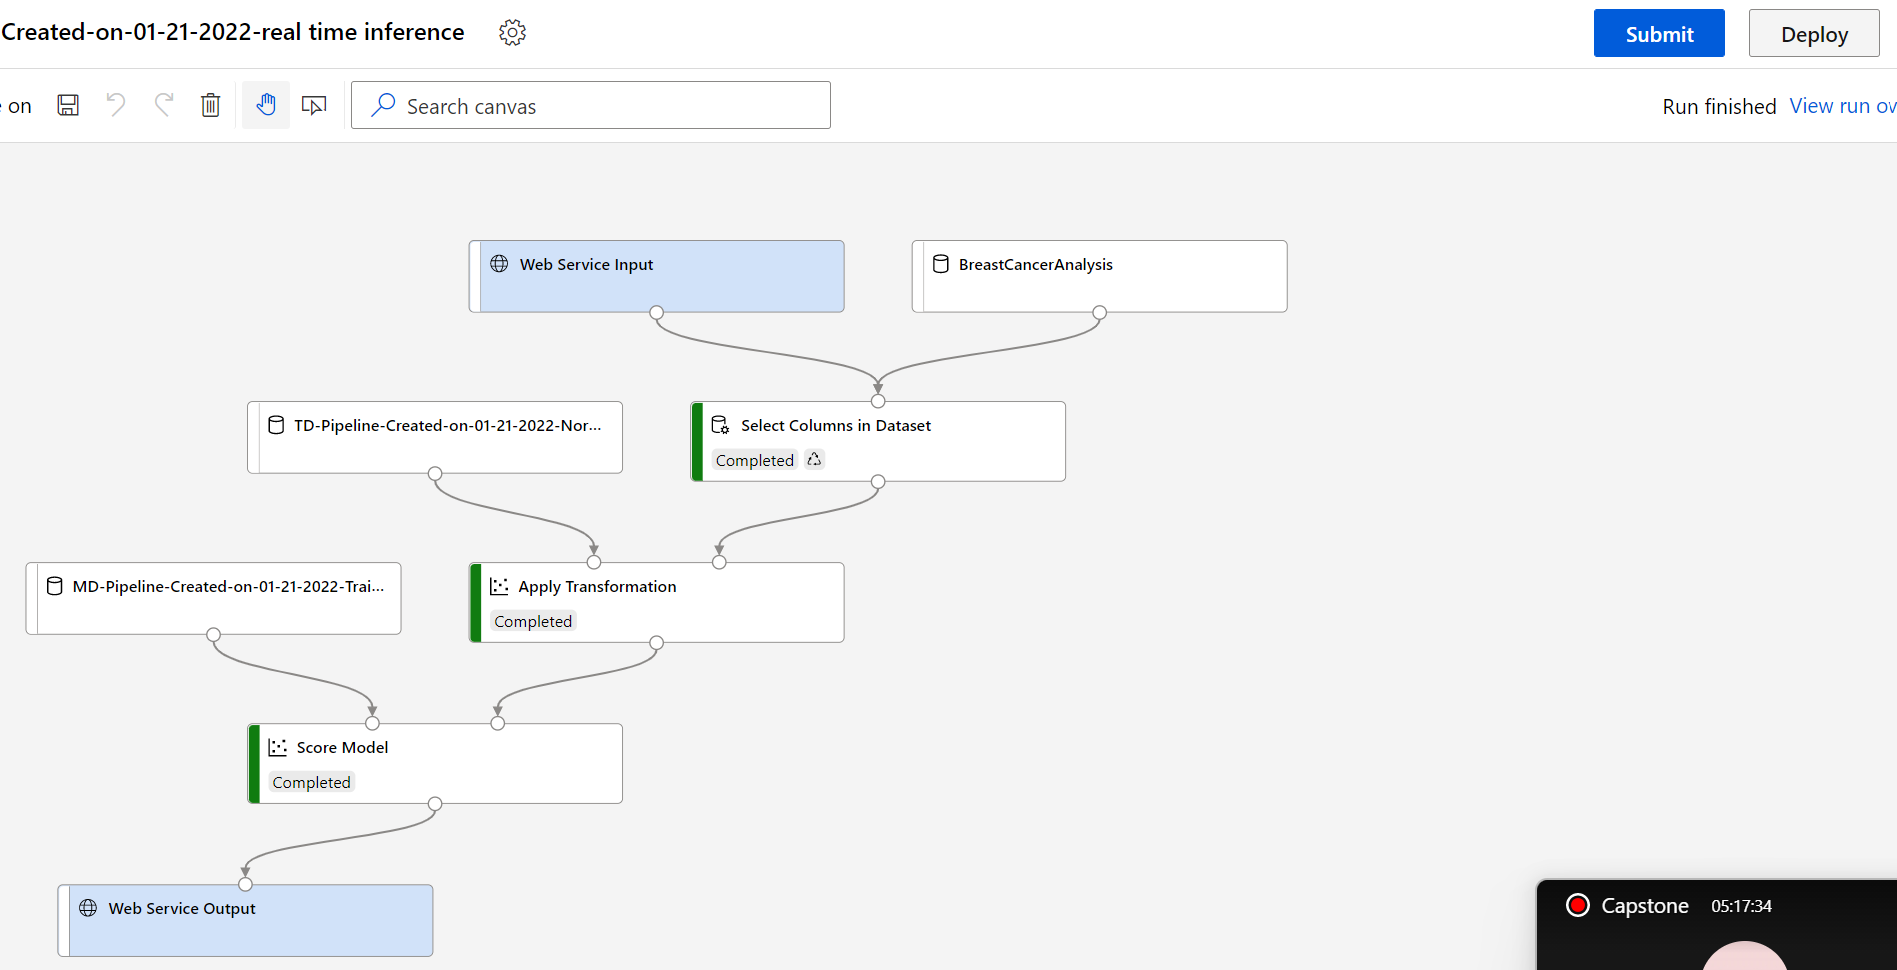

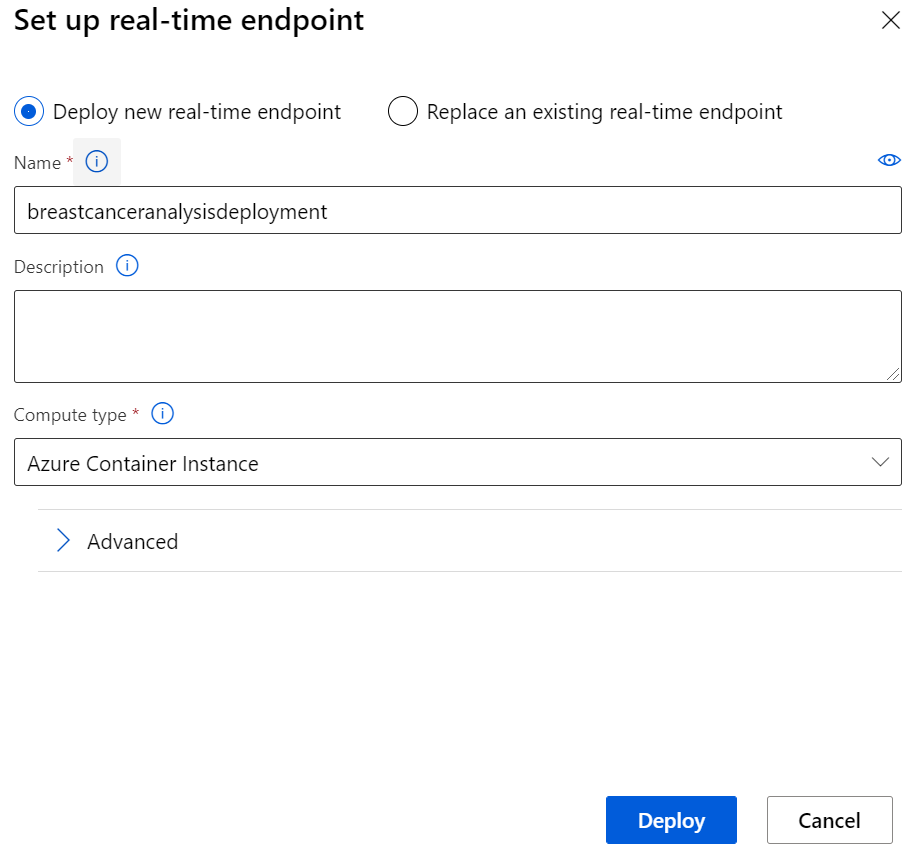

In [ ]:
# Below screenshot shows the deployment is Healthy

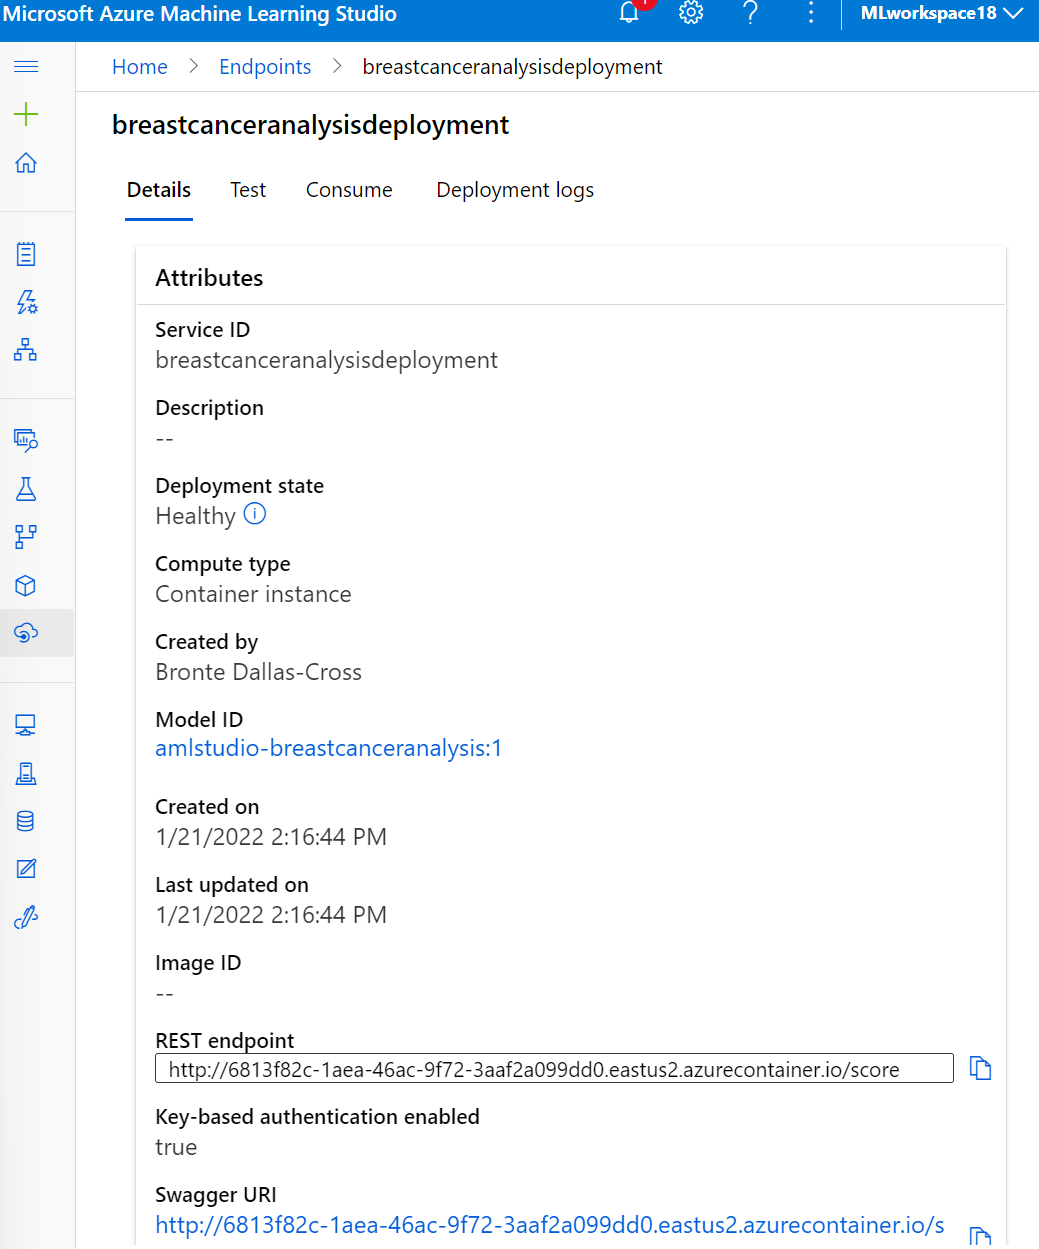

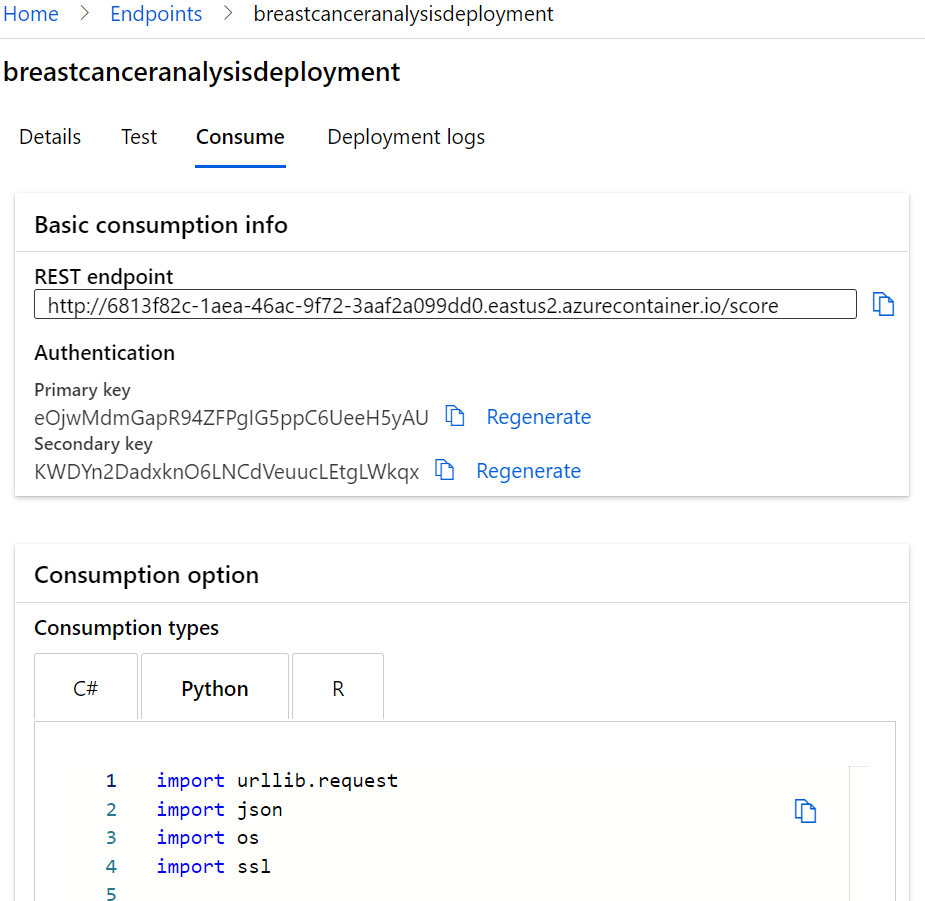

In [ ]:
# Consumption python code for deployment, shown in screenshot above, is copied below

In [ ]:
import urllib.request
import json
import os
import ssl

def allowSelfSignedHttps(allowed):
    # bypass the server certificate verification on client side
    if allowed and not os.environ.get('PYTHONHTTPSVERIFY', '') and getattr(ssl, '_create_unverified_context', None):
        ssl._create_default_https_context = ssl._create_unverified_context

allowSelfSignedHttps(True) # this line is needed if you use self-signed certificate in your scoring service.

# Request data goes here
data = {
    "Inputs": {
        "WebServiceInput0":
        [
            {
                'id': "842302",
                'diagnosis': "M",
                'radius_mean': "17.99",
                'texture_mean': "10.38",
                'perimeter_mean': "122.8",
                'area_mean': "1001",
                'smoothness_mean': "0.1184",
                'compactness_mean': "0.2776",
                'concavity_mean': "0.3001",
                'symmetry_mean': "0.2419",
                'fractal_dimension_mean': "0.07871",
            },
        ],
    },
    "GlobalParameters": {
    }
}

body = str.encode(json.dumps(data))

url = 'http://6813f82c-1aea-46ac-9f72-3aaf2a099dd0.eastus2.azurecontainer.io/score'
api_key = 'eOjwMdmGapR94ZFPgIG5ppC6UeeH5yAU' # Replace this with the API key for the web service
headers = {'Content-Type':'application/json', 'Authorization':('Bearer '+ api_key)}

req = urllib.request.Request(url, body, headers)

try:
    response = urllib.request.urlopen(req)

    result = response.read()
    print(result)
except urllib.error.HTTPError as error:
    print("The request failed with status code: " + str(error.code))

    # Print the headers - they include the requert ID and the timestamp, which are useful for debugging the failure
    print(error.info())
    print(json.loads(error.read().decode("utf8", 'ignore')))

b'{"Results": {"WebServiceOutput0": [{"id": 842302, "diagnosis": "M", "radius_mean": 1.0970639814699839, "texture_mean": -2.073335014697587, "perimeter_mean": 1.2699336881399386, "area_mean": 0.9843749048031144, "smoothness_mean": 1.5684663292434218, "compactness_mean": 3.283514670986828, "concavity_mean": 2.652873983743169, "symmetry_mean": 2.2175150059646414, "fractal_dimension_mean": 2.255746885296271, "Scored Probabilities_B": 0.0, "Scored Probabilities_M": 1.0, "Scored Labels": "M"}]}}'


In [ ]:
# Thank you, I hope I have completed the project as expected! :)